In [ ]:
# ----------------------------------------- MO-IT148_ADET Smart Landscape Monitoring with Payment System_NIEVA OSIAS JR-----------------------------------------

import pandas as pd                         # data handling and saving
import numpy as np                          # random number generation
from datetime import datetime, timedelta    # date time generation

num_records = 300  # Number of records

# Updated categories
vegetation_types = ["Native Grass", "Ornamental Shrubs", "Tropical Trees", "Ground Cover", "Succulents"]
project_statuses = ["Schematics Phase", "Design Devt. Phase", "Contract Document Phase", "Construction Phase", "Maintenance Phase"]
locations = {
    "Quezon City": (14.6760, 121.0437),
    "Makati": (14.5547, 121.0244),
    "Taguig": (14.5176, 121.0509),
    "Cebu City": (10.3157, 123.8854),
    "Davao City": (7.1907, 125.4553),
    "Baguio": (16.4023, 120.5960),
    "Pasig": (14.5764, 121.0851),
    "Manila": (14.5995, 120.9842),
    "Parañaque": (14.4791, 121.0198),
    "Mandaluyong": (14.5794, 121.0359),
    "San Juan": (14.6042, 121.0292),
    "Las Piñas": (14.4443, 120.9930),
    "Caloocan": (14.6488, 120.9789),
    "Valenzuela": (14.7011, 120.9830),
    "Marikina": (14.6507, 121.1029),
    "Muntinlupa": (14.4081, 121.0415),
    "Navotas": (14.6667, 120.9414),
    "Antipolo": (14.6255, 121.1245),
    "Imus": (14.4297, 120.9367),
    "Dasmariñas": (14.3294, 120.9367),
    "Bacoor": (14.4600, 120.9617),
    "General Trias": (14.3869, 120.8811),
    "San Pedro": (14.3576, 121.0583),
    "Santa Rosa": (14.3122, 121.1114),
    "Biñan": (14.3424, 121.0803),
    "Calamba": (14.2116, 121.1650),
    "Batangas City": (13.7565, 121.0583),
    "Lipa": (13.9411, 121.1624),
    "Tarlac City": (15.4802, 120.5979),
    "Olongapo": (14.8371, 120.2820),
    "Angeles City": (15.1473, 120.5849),
    "San Fernando (Pampanga)": (15.0302, 120.6844),
    "Iloilo City": (10.7202, 122.5621),
    "Bacolod City": (10.6765, 122.9509),
    "Zamboanga City": (6.9214, 122.0790),
    "Butuan": (8.9475, 125.5406),
    "Cagayan de Oro": (8.4542, 124.6319),
    "Puerto Princesa": (9.7392, 118.7353),
    "Tagum": (7.4475, 125.8072),
    "Legazpi": (13.1391, 123.7438),
    "Naga City": (13.6218, 123.1948)
}

project_types = ["Urban Park", "Rooftop Garden", "Public Plaza", "Residential Landscape", "Campus Landscape", "Commercial", "Institutional"]
weather_conditions = ["Sunny", "Cloudy", "Rainy", "Stormy", "Windy"]
payment_statuses = ["Paid", "Pending", "Overdue"]

# sample owners
provided_names = [
    "Albert Pablo", "Fergus Laurente", "Daniel Guzman", "Elton Rico", "Arvin dela Cruz", "Ernie Sotto",
    "Jacob Vasquez", "Jerome Gregorio", "Christian Guillermo", "Genkei Javier", "Christian Reyes",
    "Jaime Nicolas", "Ryan Fajardo", "Crisanto Pangilinan", "Nathan Malinao", "Xavier Andaya", "Calix Blanco",
    "Harlem de Los Santos", "Dranreb Manuel", "Wilfred dela Rosa", "Benjamin Alarcon", "Arellano Punzalan",
    "Melchor Catalan", "Jalen Conde", "Kylen Villareal", "Johnny Espino", "John Paul Cuizon", "Rodrigo Baguio",
    "Joshua Delos Reyes", "Alvin Narciso", "Ryan Musa", "Jonas Corpuz", "Danilo Prado", "John Carlo Pimentel",
    "John Mark Asuncion", "Juan Cruz", "Jaime Ballesteros", "Lancel Cano", "Calgary Molina", "Arvin Arcilla",
    "Aaron Benitez", "Ash Bondoc", "Cedric Fernando", "Fraley Manansala", "John Rey Castro", "Juan Tenorio",
    "Shawn Domingo", "James Samson", "Vince Perez", "Cyler Cordova"
]

filipino_first_names = [
    "Jose", "Maria", "Juan", "Ana", "Antonio", "Luz", "Pedro", "Carmen", "Ramon", "Teresa",
    "Carlos", "Rosa", "Andres", "Elena", "Miguel", "Isabel", "Ricardo", "Leticia", "Manuel", "Dolores",
    "Roberto", "Ligaya", "Eduardo", "Consuelo", "Fernando", "Virginia", "Jesus", "Estrella", "Jorge", "Adela"
]

filipino_last_names = [
    "Reyes", "Cruz", "Dela Cruz", "Santos", "Garcia", "Mendoza", "Torres", "Gonzales", "Ramos", "Lopez",
    "Rodriguez", "Morales", "Aquino", "Castro", "Villanueva", "Domingo", "Marquez", "Navarro", "Aguilar", "Salazar",
    "Delos Santos", "Silva", "Soriano", "Velasco", "Bautista", "Padilla", "Alvarez", "Ocampo", "Pascual", "Flores"
]
# sample designer
designer = [
    "Osias Landscape Design Studio","GreenScape Inc.", "Urban Eden Co.", "TropiLand Design", "EcoHabitat", "NatureScape PH",
    "VerdeWorks Studio", "Lush Living Landscapes", "BioVerdant Group", "ArborVista Design",
    "EcoTierra Solutions", "ZenCanopy Designs", "GreenForm Innovations", "TerraLeaf Collective",
    "UrbanCanopy Builders", "FloraFusion Co.", "BotaniCore Inc.", "Verdant Visions Ltd.",
    "MetroGreen Projects", "EcoVerde Philippines", "Leafline Studio"
]

# Random data generation
data = []
for _ in range(num_records):
    location = np.random.choice(list(locations.keys()))
    lat, lon = locations[location]

    deposit = round(np.random.uniform(200_000, 5_000_000), 2)
    withdraw = round(np.random.uniform(100_000, deposit), 2)
    balance = round(deposit - withdraw, 2)

    project_record = {
        "timestamp": datetime.now() - timedelta(days=np.random.randint(0, 30)),
        "project_id": f"PRJ{np.random.randint(1000, 9999)}",
        "location": location,
        "latitude": round(lat + np.random.uniform(-0.01, 0.01), 6),
        "longitude": round(lon + np.random.uniform(-0.01, 0.01), 6),
        "elevation_meters": round(np.random.uniform(5, 2000), 1),
        "project_type": np.random.choice(project_types),
        # Smart Monitoring of Landscape
        "vegetation_type": np.random.choice(vegetation_types),
        "density_of_vegetation": round(np.random.uniform(20.0, 95.0), 1),
        "soil_moisture": round(np.random.uniform(20.0, 80.0), 2),
        "temperature_c": round(np.random.uniform(24.0, 35.0), 1),
        "humidity_percent": round(np.random.uniform(50.0, 95.0), 1),
        "wind_speed_kph": round(np.random.uniform(0.0, 20.0), 1),
        "sunlight_hours": round(np.random.uniform(4.0, 10.0), 1),
        "weather_condition": np.random.choice(weather_conditions),
        # Project details
        "project_status": np.random.choice(project_statuses),
        "water_usage_liters": round(np.random.uniform(50.0, 300.0), 1),
        "maintenance_required": np.random.choice([True, False], p=[0.3, 0.7]),
        "landscape_architect_id": str(np.random.randint(1, 10001)).zfill(4),
        "budget_allocated_php": np.random.randint(500_000, 5_000_000),
        "contract_amount_php": np.random.randint(400_000, 6_000_000),
        "environmental_impact_assessment_score": round(np.random.uniform(1.0, 10.0), 1),
        # financial aspect of the project
        "payment_status": np.random.choice(payment_statuses),
        "owner": np.random.choice(provided_names),
        "designer": np.random.choice(designer),
        "deposit_php": deposit,
        "withdraw_php": withdraw,
        "balance_checker_php": balance
    }
    data.append(project_record)

# Save as DataFrame
df = pd.DataFrame(data)
df.to_csv("landscape_project_with_payment.csv", index=False)
df.to_json("landscape_project_with_payment.json", orient="records")

# Display sample
print(df.head())
print("Dataset saved as 'landscape_project_with_payment.csv' and '.json'")


                   timestamp project_id      location   latitude   longitude  \
0 2025-05-17 18:16:40.749251    PRJ7930  Angeles City  15.143909  120.580884   
1 2025-05-16 18:16:40.749897    PRJ2119    Muntinlupa  14.416256  121.049182   
2 2025-05-17 18:16:40.750271    PRJ1681          Lipa  13.939688  121.162026   
3 2025-05-10 18:16:40.750617    PRJ8488      San Juan  14.596323  121.020297   
4 2025-05-17 18:16:40.750954    PRJ5506          Imus  14.426938  120.938745   

   elevation_meters    project_type    vegetation_type  density_of_vegetation  \
0             994.3      Urban Park  Ornamental Shrubs                   46.7   
1             765.1    Public Plaza     Tropical Trees                   93.9   
2             855.6    Public Plaza       Native Grass                   66.4   
3             483.1  Rooftop Garden         Succulents                   44.2   
4              42.7  Rooftop Garden       Native Grass                   42.0   

   soil_moisture  ...  landscape

In [1]:
from web3 import Web3
import json

# Using the correct port from Ganache: 7545
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Connection test
if web3.is_connected():
    print("Osias you connected to Ganache successfully!")
else:
    print("Osias your Connection failed. Ensure Ganache is running.")

Osias you connected to Ganache successfully!


In [ ]:
# ----------------------------------------- MO-IT148_ADET Smart Landscape Monitoring with Payment System_NIEVA OSIAS JR-----------------------------------------

from web3 import Web3
import json

# Same Address to Connect to local Ganache blockchain
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Connection test
if web3.is_connected():
    print("Osias you Connected to Ganache successfully!")
else:
    print("Osias Connection failed. Ensure Ganache is running.")
    exit()

# Replace with your deployed contract address from Remix
contract_address = web3.to_checksum_address("0x5dA13C212C24E3Eb72b3b57E945339a4C11f068C")

# ABI copied from Remix after contract compilation
abi = json.loads("""[
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "_projectId",
				"type": "string"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "location",
						"type": "string"
					},
					{
						"internalType": "int256",
						"name": "latitude",
						"type": "int256"
					},
					{
						"internalType": "int256",
						"name": "longitude",
						"type": "int256"
					},
					{
						"internalType": "uint256",
						"name": "elevationMeters",
						"type": "uint256"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.LocationInfo",
				"name": "_locationInfo",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "vegetationType",
						"type": "string"
					},
					{
						"internalType": "uint256",
						"name": "densityOfVegetation",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "soilMoisture",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "temperatureC",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "humidityPercent",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "windSpeedKph",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "sunlightHours",
						"type": "uint256"
					},
					{
						"internalType": "string",
						"name": "weatherCondition",
						"type": "string"
					},
					{
						"internalType": "uint256",
						"name": "environmentalImpactAssessmentScore",
						"type": "uint256"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.EnvironmentData",
				"name": "_environmentData",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "uint256",
						"name": "budgetAllocatedPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "contractAmountPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "depositPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "withdrawPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "balanceCheckerPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint8",
						"name": "paymentStatus",
						"type": "uint8"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.FinancialData",
				"name": "_financialData",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "projectType",
						"type": "string"
					},
					{
						"internalType": "uint8",
						"name": "projectStatus",
						"type": "uint8"
					},
					{
						"internalType": "uint256",
						"name": "waterUsageLiters",
						"type": "uint256"
					},
					{
						"internalType": "bool",
						"name": "maintenanceRequired",
						"type": "bool"
					},
					{
						"internalType": "string",
						"name": "landscapeArchitectId",
						"type": "string"
					},
					{
						"internalType": "string",
						"name": "owner",
						"type": "string"
					},
					{
						"internalType": "string",
						"name": "designer",
						"type": "string"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.ProjectDetails",
				"name": "_projectDetails",
				"type": "tuple"
			}
		],
		"name": "createProject",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"anonymous": false,
		"inputs": [
			{
				"indexed": false,
				"internalType": "string",
				"name": "projectId",
				"type": "string"
			},
			{
				"indexed": false,
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			}
		],
		"name": "ProjectCreated",
		"type": "event"
	},
	{
		"inputs": [],
		"name": "getAllProjectIds",
		"outputs": [
			{
				"internalType": "string[]",
				"name": "",
				"type": "string[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "_projectId",
				"type": "string"
			}
		],
		"name": "getProject",
		"outputs": [
			{
				"components": [
					{
						"internalType": "uint256",
						"name": "timestamp",
						"type": "uint256"
					},
					{
						"internalType": "string",
						"name": "projectId",
						"type": "string"
					},
					{
						"components": [
							{
								"internalType": "string",
								"name": "location",
								"type": "string"
							},
							{
								"internalType": "int256",
								"name": "latitude",
								"type": "int256"
							},
							{
								"internalType": "int256",
								"name": "longitude",
								"type": "int256"
							},
							{
								"internalType": "uint256",
								"name": "elevationMeters",
								"type": "uint256"
							}
						],
						"internalType": "struct SmartLandscapeMonitoring.LocationInfo",
						"name": "locationInfo",
						"type": "tuple"
					},
					{
						"components": [
							{
								"internalType": "string",
								"name": "vegetationType",
								"type": "string"
							},
							{
								"internalType": "uint256",
								"name": "densityOfVegetation",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "soilMoisture",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "temperatureC",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "humidityPercent",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "windSpeedKph",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "sunlightHours",
								"type": "uint256"
							},
							{
								"internalType": "string",
								"name": "weatherCondition",
								"type": "string"
							},
							{
								"internalType": "uint256",
								"name": "environmentalImpactAssessmentScore",
								"type": "uint256"
							}
						],
						"internalType": "struct SmartLandscapeMonitoring.EnvironmentData",
						"name": "environmentData",
						"type": "tuple"
					},
					{
						"components": [
							{
								"internalType": "uint256",
								"name": "budgetAllocatedPhp",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "contractAmountPhp",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "depositPhp",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "withdrawPhp",
								"type": "uint256"
							},
							{
								"internalType": "uint256",
								"name": "balanceCheckerPhp",
								"type": "uint256"
							},
							{
								"internalType": "uint8",
								"name": "paymentStatus",
								"type": "uint8"
							}
						],
						"internalType": "struct SmartLandscapeMonitoring.FinancialData",
						"name": "financialData",
						"type": "tuple"
					},
					{
						"components": [
							{
								"internalType": "string",
								"name": "projectType",
								"type": "string"
							},
							{
								"internalType": "uint8",
								"name": "projectStatus",
								"type": "uint8"
							},
							{
								"internalType": "uint256",
								"name": "waterUsageLiters",
								"type": "uint256"
							},
							{
								"internalType": "bool",
								"name": "maintenanceRequired",
								"type": "bool"
							},
							{
								"internalType": "string",
								"name": "landscapeArchitectId",
								"type": "string"
							},
							{
								"internalType": "string",
								"name": "owner",
								"type": "string"
							},
							{
								"internalType": "string",
								"name": "designer",
								"type": "string"
							}
						],
						"internalType": "struct SmartLandscapeMonitoring.ProjectDetails",
						"name": "projectDetails",
						"type": "tuple"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.Project",
				"name": "",
				"type": "tuple"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "projectIds",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			}
		],
		"name": "projects",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "projectId",
				"type": "string"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "location",
						"type": "string"
					},
					{
						"internalType": "int256",
						"name": "latitude",
						"type": "int256"
					},
					{
						"internalType": "int256",
						"name": "longitude",
						"type": "int256"
					},
					{
						"internalType": "uint256",
						"name": "elevationMeters",
						"type": "uint256"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.LocationInfo",
				"name": "locationInfo",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "vegetationType",
						"type": "string"
					},
					{
						"internalType": "uint256",
						"name": "densityOfVegetation",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "soilMoisture",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "temperatureC",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "humidityPercent",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "windSpeedKph",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "sunlightHours",
						"type": "uint256"
					},
					{
						"internalType": "string",
						"name": "weatherCondition",
						"type": "string"
					},
					{
						"internalType": "uint256",
						"name": "environmentalImpactAssessmentScore",
						"type": "uint256"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.EnvironmentData",
				"name": "environmentData",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "uint256",
						"name": "budgetAllocatedPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "contractAmountPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "depositPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "withdrawPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint256",
						"name": "balanceCheckerPhp",
						"type": "uint256"
					},
					{
						"internalType": "uint8",
						"name": "paymentStatus",
						"type": "uint8"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.FinancialData",
				"name": "financialData",
				"type": "tuple"
			},
			{
				"components": [
					{
						"internalType": "string",
						"name": "projectType",
						"type": "string"
					},
					{
						"internalType": "uint8",
						"name": "projectStatus",
						"type": "uint8"
					},
					{
						"internalType": "uint256",
						"name": "waterUsageLiters",
						"type": "uint256"
					},
					{
						"internalType": "bool",
						"name": "maintenanceRequired",
						"type": "bool"
					},
					{
						"internalType": "string",
						"name": "landscapeArchitectId",
						"type": "string"
					},
					{
						"internalType": "string",
						"name": "owner",
						"type": "string"
					},
					{
						"internalType": "string",
						"name": "designer",
						"type": "string"
					}
				],
				"internalType": "struct SmartLandscapeMonitoring.ProjectDetails",
				"name": "projectDetails",
				"type": "tuple"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]
""")

# Create contract instance
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set default account (typically the first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]

print(f"✅ Connected to Smart Contract at {contract_address}")

Osias you Connected to Ganache successfully!
✅ Connected to Smart Contract at 0x5dA13C212C24E3Eb72b3b57E945339a4C11f068C


In [2]:
import pandas as pd
df_csv = pd.read_csv("landscape_project_with_payment.csv")
df_json = pd.read_json("landscape_project_with_payment.json")
print(df_csv.head())

                    timestamp project_id      location   latitude   longitude  \
0  2025-05-30 20:26:43.487447    PRJ4680  Bacolod City  10.673298  122.946780   
1  2025-05-25 20:26:43.490734    PRJ9917    Dasmariñas  14.336329  120.944176   
2  2025-05-16 20:26:43.491287    PRJ4412          Imus  14.432608  120.943093   
3  2025-05-19 20:26:43.491665    PRJ4942     Naga City  13.628742  123.196506   
4  2025-05-10 20:26:43.492031    PRJ8541         Biñan  14.339566  121.088356   

   elevation_meters           project_type    vegetation_type  \
0            1885.7           Public Plaza  Ornamental Shrubs   
1             547.1       Campus Landscape       Native Grass   
2            1410.7          Institutional       Ground Cover   
3             219.6           Public Plaza       Native Grass   
4            1528.5  Residential Landscape       Ground Cover   

   density_of_vegetation  soil_moisture  ...  landscape_architect_id  \
0                   85.0          43.13  ...      

In [ ]:
# ----------------------------------------- MO-IT148_ADET Smart Landscape Monitoring with Payment System_NIEVA OSIAS JR-----------------------------------------

import pandas as pd
from web3 import Web3
import json

# Connect to Ganache
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
assert web3.is_connected(), "❌ Not connected to Ganache"

# Paste your ABI string here (from Remix or your contract build)
abi = json.loads("""
[ 
    {
        "anonymous": false,
        "inputs": [
            {
                "indexed": false,
                "internalType": "string",
                "name": "projectId",
                "type": "string"
            },
            {
                "indexed": false,
                "internalType": "uint256",
                "name": "timestamp",
                "type": "uint256"
            }
        ],
        "name": "ProjectCreated",
        "type": "event"
    },
    {
        "inputs": [
            {
                "internalType": "string",
                "name": "_projectId",
                "type": "string"
            },
            {
                "components": [
                    {
                        "internalType": "string",
                        "name": "location",
                        "type": "string"
                    },
                    {
                        "internalType": "int256",
                        "name": "latitude",
                        "type": "int256"
                    },
                    {
                        "internalType": "int256",
                        "name": "longitude",
                        "type": "int256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "elevationMeters",
                        "type": "uint256"
                    }
                ],
                "internalType": "struct SmartLandscapeMonitoring.LocationInfo",
                "name": "_locationInfo",
                "type": "tuple"
            },
            {
                "components": [
                    {
                        "internalType": "string",
                        "name": "vegetationType",
                        "type": "string"
                    },
                    {
                        "internalType": "uint256",
                        "name": "densityOfVegetation",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "soilMoisture",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "temperatureC",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "humidityPercent",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "windSpeedKph",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "sunlightHours",
                        "type": "uint256"
                    },
                    {
                        "internalType": "string",
                        "name": "weatherCondition",
                        "type": "string"
                    },
                    {
                        "internalType": "uint256",
                        "name": "environmentalImpactAssessmentScore",
                        "type": "uint256"
                    }
                ],
                "internalType": "struct SmartLandscapeMonitoring.EnvironmentData",
                "name": "_environmentData",
                "type": "tuple"
            },
            {
                "components": [
                    {
                        "internalType": "uint256",
                        "name": "budgetAllocatedPhp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "contractAmountPhp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "depositPhp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "withdrawPhp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint256",
                        "name": "balanceCheckerPhp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "uint8",
                        "name": "paymentStatus",
                        "type": "uint8"
                    }
                ],
                "internalType": "struct SmartLandscapeMonitoring.FinancialData",
                "name": "_financialData",
                "type": "tuple"
            },
            {
                "components": [
                    {
                        "internalType": "string",
                        "name": "projectType",
                        "type": "string"
                    },
                    {
                        "internalType": "uint8",
                        "name": "projectStatus",
                        "type": "uint8"
                    },
                    {
                        "internalType": "uint256",
                        "name": "waterUsageLiters",
                        "type": "uint256"
                    },
                    {
                        "internalType": "bool",
                        "name": "maintenanceRequired",
                        "type": "bool"
                    },
                    {
                        "internalType": "string",
                        "name": "landscapeArchitectId",
                        "type": "string"
                    },
                    {
                        "internalType": "string",
                        "name": "owner",
                        "type": "string"
                    },
                    {
                        "internalType": "string",
                        "name": "designer",
                        "type": "string"
                    }
                ],
                "internalType": "struct SmartLandscapeMonitoring.ProjectDetails",
                "name": "_projectDetails",
                "type": "tuple"
            }
        ],
        "name": "createProject",
        "outputs": [],
        "stateMutability": "nonpayable",
        "type": "function"
    },
    {
        "inputs": [],
        "name": "getAllProjectIds",
        "outputs": [
            {
                "internalType": "string[]",
                "name": "",
                "type": "string[]"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    },
    {
        "inputs": [
            {
                "internalType": "string",
                "name": "_projectId",
                "type": "string"
            }
        ],
        "name": "getProject",
        "outputs": [
            {
                "components": [
                    {
                        "internalType": "uint256",
                        "name": "timestamp",
                        "type": "uint256"
                    },
                    {
                        "internalType": "string",
                        "name": "projectId",
                        "type": "string"
                    },
                    {
                        "components": [
                            {
                                "internalType": "string",
                                "name": "location",
                                "type": "string"
                            },
                            {
                                "internalType": "int256",
                                "name": "latitude",
                                "type": "int256"
                            },
                            {
                                "internalType": "int256",
                                "name": "longitude",
                                "type": "int256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "elevationMeters",
                                "type": "uint256"
                            }
                        ],
                        "internalType": "struct SmartLandscapeMonitoring.LocationInfo",
                        "name": "locationInfo",
                        "type": "tuple"
                    },
                    {
                        "components": [
                            {
                                "internalType": "string",
                                "name": "vegetationType",
                                "type": "string"
                            },
                            {
                                "internalType": "uint256",
                                "name": "densityOfVegetation",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "soilMoisture",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "temperatureC",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "humidityPercent",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "windSpeedKph",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "sunlightHours",
                                "type": "uint256"
                            },
                            {
                                "internalType": "string",
                                "name": "weatherCondition",
                                "type": "string"
                            },
                            {
                                "internalType": "uint256",
                                "name": "environmentalImpactAssessmentScore",
                                "type": "uint256"
                            }
                        ],
                        "internalType": "struct SmartLandscapeMonitoring.EnvironmentData",
                        "name": "environmentData",
                        "type": "tuple"
                    },
                    {
                        "components": [
                            {
                                "internalType": "uint256",
                                "name": "budgetAllocatedPhp",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "contractAmountPhp",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "depositPhp",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "withdrawPhp",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint256",
                                "name": "balanceCheckerPhp",
                                "type": "uint256"
                            },
                            {
                                "internalType": "uint8",
                                "name": "paymentStatus",
                                "type": "uint8"
                            }
                        ],
                        "internalType": "struct SmartLandscapeMonitoring.FinancialData",
                        "name": "financialData",
                        "type": "tuple"
                    },
                    {
                        "components": [
                            {
                                "internalType": "string",
                                "name": "projectType",
                                "type": "string"
                            },
                            {
                                "internalType": "uint8",
                                "name": "projectStatus",
                                "type": "uint8"
                            },
                            {
                                "internalType": "uint256",
                                "name": "waterUsageLiters",
                                "type": "uint256"
                            },
                            {
                                "internalType": "bool",
                                "name": "maintenanceRequired",
                                "type": "bool"
                            },
                            {
                                "internalType": "string",
                                "name": "landscapeArchitectId",
                                "type": "string"
                            },
                            {
                                "internalType": "string",
                                "name": "owner",
                                "type": "string"
                            },
                            {
                                "internalType": "string",
                                "name": "designer",
                                "type": "string"
                            }
                        ],
                        "internalType": "struct SmartLandscapeMonitoring.ProjectDetails",
                        "name": "projectDetails",
                        "type": "tuple"
                    }
                ],
                "internalType": "struct SmartLandscapeMonitoring.Project",
                "name": "",
                "type": "tuple"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    }
 ]
""")

contract_address = web3.to_checksum_address("0x5dA13C212C24E3Eb72b3b57E945339a4C11f068C")
contract = web3.eth.contract(address=contract_address, abi=abi)
sender_address = web3.eth.accounts[0]

# Load CSV
df = pd.read_csv("landscape_project_with_payment.csv")
print("✅ CSV loaded successfully with", len(df), "rows.")

# Helper: map status/payment to uint8
project_statuses = [
    "Schematics Phase", "Design Devt. Phase", "Contract Document Phase", "Construction Phase", "Maintenance Phase"
]
payment_statuses = ["Paid", "Pending", "Overdue"]

def status_to_uint8(status, status_list):
    try:
        return status_list.index(status)
    except ValueError:
        return 0

# Get all existing project IDs from the contract to avoid duplicates
# ...existing code above...

# Get all existing project IDs from the contract to avoid duplicates
try:
    existing_ids = set(contract.functions.getAllProjectIds().call())
except Exception as e:
    print("Could not fetch existing project IDs:", e)
    existing_ids = set()

skipped = 0
uploaded = 0

for idx, row in df.iterrows():                  
    project_id = str(row["project_id"])
    if project_id in existing_ids:
        print(f"⏩ Skipping row {idx+1}: Project ID {project_id} already exists.")
        skipped += 1
        continue
    try:
        tx = contract.functions.createProject(
            project_id,
            (
                str(row["location"]),
                int(float(row["latitude"]) * 1e6),
                int(float(row["longitude"]) * 1e6),
                int(row["elevation_meters"])
            ),
            (
                str(row["vegetation_type"]),
                int(row["density_of_vegetation"]),
                int(row["soil_moisture"]),
                int(row["temperature_c"]),
                int(row["humidity_percent"]),
                int(row["wind_speed_kph"]),
                int(row["sunlight_hours"]),
                str(row["weather_condition"]),
                int(row["environmental_impact_assessment_score"])
            ),
            (
                int(row["budget_allocated_php"]),
                int(row["contract_amount_php"]),
                int(row["deposit_php"]),
                int(row["withdraw_php"]),
                int(row["balance_checker_php"]),
                status_to_uint8(row["payment_status"], payment_statuses)
            ),
            (
                str(row["project_type"]),
                status_to_uint8(row["project_status"], project_statuses),
                int(row["water_usage_liters"]),
                bool(row["maintenance_required"]),
                str(row["landscape_architect_id"]),
                str(row["owner"]),
                str(row["designer"])
            )
        ).transact({"from": sender_address})

        receipt = web3.eth.wait_for_transaction_receipt(tx)
        print(f"Uploaded row {idx + 1}: Tx Hash = {tx.hex()}")
        uploaded += 1
        existing_ids.add(project_id)  # Prevent duplicate in this session

    except Exception as e:
        print(f" Error uploading row {idx+1} (Project ID {project_id}): {e}")
        skipped += 1

print(f"All projects uploaded to Ganache smart contract. Uploaded: {uploaded}, Skipped: {skipped}")
# ...existing code below...

✅ CSV loaded successfully with 1000 rows.
⏩ Skipping row 1: Project ID PRJ4680 already exists.
⏩ Skipping row 2: Project ID PRJ9917 already exists.
⏩ Skipping row 3: Project ID PRJ4412 already exists.
⏩ Skipping row 4: Project ID PRJ4942 already exists.
⏩ Skipping row 5: Project ID PRJ8541 already exists.
⏩ Skipping row 6: Project ID PRJ3828 already exists.
⏩ Skipping row 7: Project ID PRJ7673 already exists.
⏩ Skipping row 8: Project ID PRJ4174 already exists.
⏩ Skipping row 9: Project ID PRJ3129 already exists.
⏩ Skipping row 10: Project ID PRJ3921 already exists.
⏩ Skipping row 11: Project ID PRJ5269 already exists.
⏩ Skipping row 12: Project ID PRJ5862 already exists.
⏩ Skipping row 13: Project ID PRJ1727 already exists.
⏩ Skipping row 14: Project ID PRJ5296 already exists.
⏩ Skipping row 15: Project ID PRJ5748 already exists.
⏩ Skipping row 16: Project ID PRJ6256 already exists.
⏩ Skipping row 17: Project ID PRJ4268 already exists.
⏩ Skipping row 18: Project ID PRJ8717 already exi

In [46]:
# ----------------------------------------- MO-IT148_ADET Smart Landscape Monitoring with Payment System_NIEVA OSIAS JR-----------------------------------------

# --- Retrieve all projects from the smart contract ---

all_ids = contract.functions.getAllProjectIds().call()      # Get all project IDs
print(f"Total projects on-chain: {len(all_ids)}")           # Get the count of all project IDs

all_projects = []
for pid in all_ids:
    try:
        project = contract.functions.getProject(pid).call() # Fetch project details
        all_projects.append(project)                        # Append to the list    
    except Exception as e:
        print(f"❌ Error fetching project {pid}: {e}")          

print(f"✅ Retrieved {len(all_projects)} projects from the contract.") # Display the count of retrieved projects

# Optional: Display the first project for inspection
if all_projects:
    print(all_projects[0])                                  # Display the first project details
    print(all_projects[1])                   
    print(all_projects[2])                                  
    print(all_projects[3])                                  
    print(all_projects[4])                                                 

Total projects on-chain: 961
✅ Retrieved 961 projects from the contract.
(1749392405, 'PRJ4680', ('Bacolod City', 10673298, 122946780, 1885), ('Ornamental Shrubs', 85, 43, 33, 61, 1, 6, 'Cloudy', 9), (2310774, 1533934, 4347780, 1725234, 2622545, 2), ('Public Plaza', 0, 95, False, '3108', 'Cyler Cordova', 'Urban Eden Co.'))
(1749392406, 'PRJ9917', ('Dasmariñas', 14336329, 120944176, 547), ('Native Grass', 27, 26, 29, 58, 12, 9, 'Cloudy', 5), (3701519, 1593748, 2098188, 525536, 1572652, 1), ('Campus Landscape', 3, 103, True, '9076', 'Shawn Domingo', 'Osias Landscape Design Studio'))
(1749392407, 'PRJ4412', ('Imus', 14432608, 120943093, 1410), ('Ground Cover', 42, 36, 34, 88, 11, 8, 'Rainy', 9), (1358573, 4872659, 657093, 371009, 286083, 0), ('Institutional', 2, 138, True, '5899', 'John Carlo Pimentel', 'Leafline Studio'))
(1749392408, 'PRJ4942', ('Naga City', 13628742, 123196506, 219), ('Native Grass', 62, 54, 26, 89, 17, 7, 'Windy', 6), (563340, 5122263, 4103370, 3543574, 559796, 0), ('

In [23]:

duplicates = df[df.duplicated(subset=["project_id"], keep=False)]
if not duplicates.empty:
    print("Duplicate project IDs found:")
    print(duplicates[["project_id"]])
else:
    print("No duplicate project IDs found.")

Duplicate project IDs found:
    project_id
16     PRJ4268
33     PRJ5841
42     PRJ8551
50     PRJ3664
67     PRJ4442
..         ...
950    PRJ7684
958    PRJ1207
966    PRJ2907
979    PRJ8612
986    PRJ1862

[77 rows x 1 columns]


In [24]:
print(f"✅ All projects uploaded to Ganache smart contract. Uploaded: {uploaded}, Skipped: {skipped}")

✅ All projects uploaded to Ganache smart contract. Uploaded: 795, Skipped: 205


In [25]:
# --- Retrieve all uploaded projects from the smart contract ---
all_ids = contract.functions.getAllProjectIds().call()
print(f"Total projects on-chain (uploaded): {len(all_ids)}")

# Retrieve all uploaded projects
all_projects = []
for pid in all_ids:
    try:
        project = contract.functions.getProject(pid).call()
        all_projects.append(project)
    except Exception as e:
        print(f"❌ Error fetching project {pid}: {e}")

print(f"✅ Retrieved {len(all_projects)} uploaded projects from the contract.")

# --- List all skipped project IDs from the CSV ---
uploaded_ids = set(all_ids)
csv_ids = set(df["project_id"].astype(str))
skipped_ids = sorted(list(csv_ids - uploaded_ids))
print(f"Total skipped projects: {len(skipped_ids)}")
print("Skipped project IDs:")
for pid in skipped_ids:
    print(pid)

Total projects on-chain (uploaded): 961
✅ Retrieved 961 uploaded projects from the contract.
Total skipped projects: 0
Skipped project IDs:


In [26]:
# --- List all duplicate project IDs and compute all unique data ---

# Find all duplicates (show all occurrences)
duplicates = df[df.duplicated(subset=["project_id"], keep=False)]
if not duplicates.empty:
    print("Duplicate project IDs found:")
    print(duplicates[["project_id"]].value_counts())
    print("\nFull duplicate rows:")
    print(duplicates)
else:
    print("No duplicate project IDs found.")

# Compute all unique project IDs (non-duplicates)
unique_df = df.drop_duplicates(subset=["project_id"], keep='first')
print(f"\nTotal unique project IDs: {unique_df['project_id'].nunique()}")
print(f"Total unique rows: {len(unique_df)}")

Duplicate project IDs found:
project_id
PRJ4268       3
PRJ1207       2
PRJ1585       2
PRJ1721       2
PRJ1747       2
PRJ1458       2
PRJ1862       2
PRJ1884       2
PRJ2437       2
PRJ2239       2
PRJ2830       2
PRJ2907       2
PRJ3069       2
PRJ2665       2
PRJ3387       2
PRJ3426       2
PRJ3649       2
PRJ3447       2
PRJ3664       2
PRJ3669       2
PRJ3799       2
PRJ4442       2
PRJ4459       2
PRJ5556       2
PRJ5841       2
PRJ5905       2
PRJ6057       2
PRJ6486       2
PRJ6999       2
PRJ7048       2
PRJ7351       2
PRJ7377       2
PRJ7684       2
PRJ8380       2
PRJ8434       2
PRJ8473       2
PRJ8551       2
PRJ8612       2
Name: count, dtype: int64

Full duplicate rows:
                      timestamp project_id         location   latitude  \
16   2025-06-01 20:26:43.496687    PRJ4268    Batangas City  13.753214   
33   2025-05-27 20:26:43.503146    PRJ5841           Bacoor  14.455335   
42   2025-05-22 20:26:43.506868    PRJ8551    Batangas City  13.755933   
50   202

In [43]:
headers = ["project_id", "location", "latitude", "longitude", "elevation_meters", "project_type"]

df = pd.DataFrame(all_projects, columns=headers)
print(df.head())
print(all_projects[0])  # Display the first project details
print(all_projects[1])  # Display the second project details
print(all_projects[2])  # Display the second project details
print(all_projects[3])  # Display the second project details
print(all_projects[4])  # Display the second project details

   project_id location                                   latitude  \
0  1749392405  PRJ4680  (Bacolod City, 10673298, 122946780, 1885)   
1  1749392406  PRJ9917     (Dasmariñas, 14336329, 120944176, 547)   
2  1749392407  PRJ4412          (Imus, 14432608, 120943093, 1410)   
3  1749392408  PRJ4942      (Naga City, 13628742, 123196506, 219)   
4  1749392409  PRJ8541         (Biñan, 14339566, 121088356, 1528)   

                                           longitude  \
0  (Ornamental Shrubs, 85, 43, 33, 61, 1, 6, Clou...   
1   (Native Grass, 27, 26, 29, 58, 12, 9, Cloudy, 5)   
2    (Ground Cover, 42, 36, 34, 88, 11, 8, Rainy, 9)   
3    (Native Grass, 62, 54, 26, 89, 17, 7, Windy, 6)   
4   (Ground Cover, 21, 33, 33, 59, 12, 9, Stormy, 6)   

                                   elevation_meters  \
0  (2310774, 1533934, 4347780, 1725234, 2622545, 2)   
1   (3701519, 1593748, 2098188, 525536, 1572652, 1)   
2     (1358573, 4872659, 657093, 371009, 286083, 0)   
3    (563340, 5122263, 41033

In [41]:
# Fill missing fields with None
normalized_projects = [list(p) + [None]*(28 - len(p)) for p in all_projects]

headers = [
    "timestamp", "project_id", "location", "latitude", "longitude", "elevation_meters",
    "project_type", "vegetation_type", "density_of_vegetation", "soil_moisture", 
    "temperature_c", "humidity_percent", "wind_speed_kph", "sunlight_hours", 
    "weather_condition", "project_status", "water_usage_liters", "maintenance_required", 
    "landscape_architect_id", "budget_allocated_php", "contract_amount_php", 
    "environmental_impact_assessment_score", "payment_status", "owner", "designer", 
    "deposit_php", "withdraw_php", "balance_checker_php"
]

df = pd.DataFrame(normalized_projects, columns=headers)
print(df.head())


    timestamp project_id                                   location  \
0  1749392405    PRJ4680  (Bacolod City, 10673298, 122946780, 1885)   
1  1749392406    PRJ9917     (Dasmariñas, 14336329, 120944176, 547)   
2  1749392407    PRJ4412          (Imus, 14432608, 120943093, 1410)   
3  1749392408    PRJ4942      (Naga City, 13628742, 123196506, 219)   
4  1749392409    PRJ8541         (Biñan, 14339566, 121088356, 1528)   

                                            latitude  \
0  (Ornamental Shrubs, 85, 43, 33, 61, 1, 6, Clou...   
1   (Native Grass, 27, 26, 29, 58, 12, 9, Cloudy, 5)   
2    (Ground Cover, 42, 36, 34, 88, 11, 8, Rainy, 9)   
3    (Native Grass, 62, 54, 26, 89, 17, 7, Windy, 6)   
4   (Ground Cover, 21, 33, 33, 59, 12, 9, Stormy, 6)   

                                          longitude  \
0  (2310774, 1533934, 4347780, 1725234, 2622545, 2)   
1   (3701519, 1593748, 2098188, 525536, 1572652, 1)   
2     (1358573, 4872659, 657093, 371009, 286083, 0)   
3    (563340, 51

In [47]:
# Full header of Smart Landscape Monitoring with Payment System
headers = [
    "timestamp", "project_id", "location", "latitude", "longitude", "elevation_meters",
    "project_type", "vegetation_type", "density_of_vegetation", "soil_moisture",
    "temperature_c", "humidity_percent", "wind_speed_kph", "sunlight_hours",
    "weather_condition", "project_status", "water_usage_liters", "maintenance_required",
    "landscape_architect_id", "budget_allocated_php", "contract_amount_php",
    "environmental_impact_assessment_score", "payment_status", "owner", "designer",
    "deposit_php", "withdraw_php", "balance_checker_php"
]

# Get all project IDs
all_ids = contract.functions.getAllProjectIds().call()
print(f"Total projects on-chain: {len(all_ids)}")

# Related to Project details
all_projects = []
for pid in all_ids:
    try:
        project = contract.functions.getProject(pid).call()
        all_projects.append(project)
    except Exception as e:
        print(f"❌ Error fetching project {pid}: {e}")

print(f"✅ Retrieved {len(all_projects)} projects from the contract.\n")

# Display header
print("📋 Project Details:\n")
print(" | ".join(headers))
print("-" * 500)

# Display all project data
for project in all_projects:
    # Ensure all values are converted to string for printing
    row = " | ".join(str(field) for field in project)
    print(row)
    
total_ids = len(all_ids)
total_retrieved = len(all_projects)
print(f"🧾 Requested: {total_ids} projects, ✅ Successfully retrieved: {total_retrieved}")


Total projects on-chain: 961
✅ Retrieved 961 projects from the contract.

📋 Project Details:

timestamp | project_id | location | latitude | longitude | elevation_meters | project_type | vegetation_type | density_of_vegetation | soil_moisture | temperature_c | humidity_percent | wind_speed_kph | sunlight_hours | weather_condition | project_status | water_usage_liters | maintenance_required | landscape_architect_id | budget_allocated_php | contract_amount_php | environmental_impact_assessment_score | payment_status | owner | designer | deposit_php | withdraw_php | balance_checker_php
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

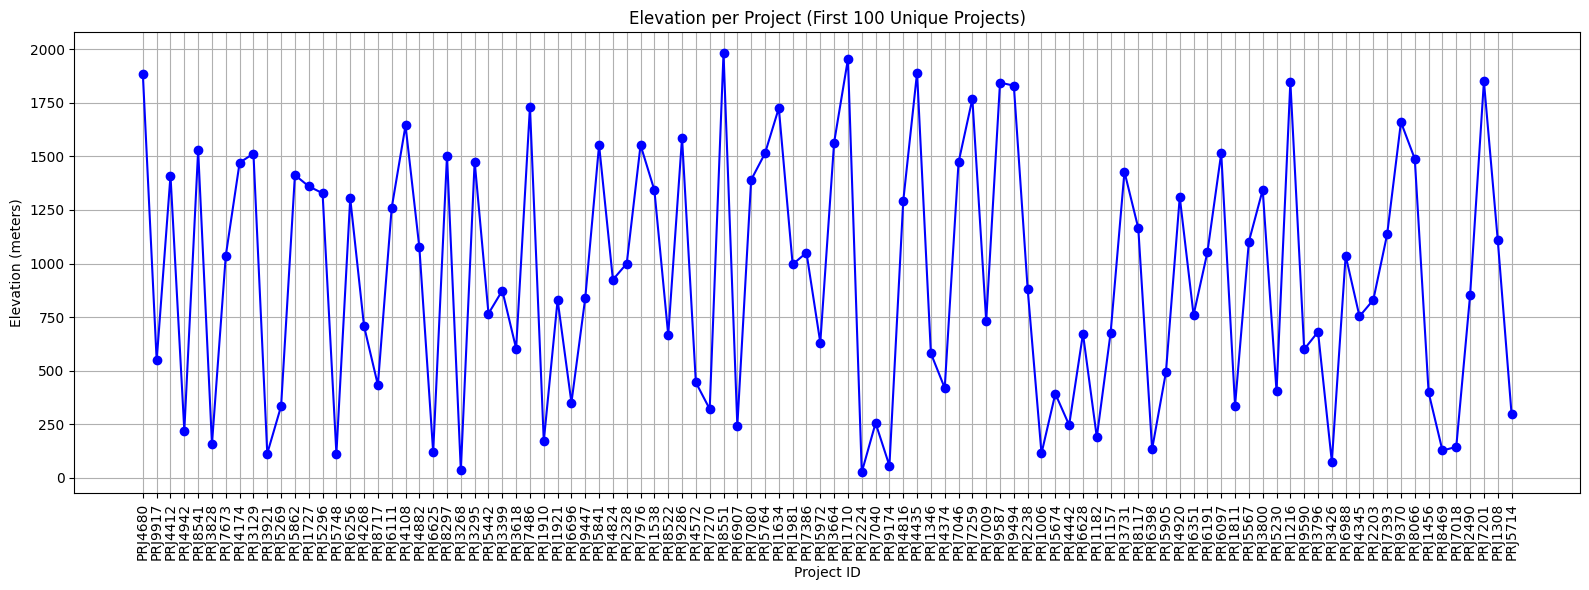

In [52]:
import matplotlib.pyplot as plt

# Use the unique_df DataFrame from your deduplication step
if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

# Limit to first 200 data points
plot_df = unique_df.head(100)

plt.figure(figsize=(16, 6))
plt.plot(plot_df['project_id'], plot_df['elevation_meters'], marker='o', linestyle='-', color='b')
plt.title('Elevation per Project (First 100 Unique Projects)')
plt.xlabel('Project ID')
plt.ylabel('Elevation (meters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

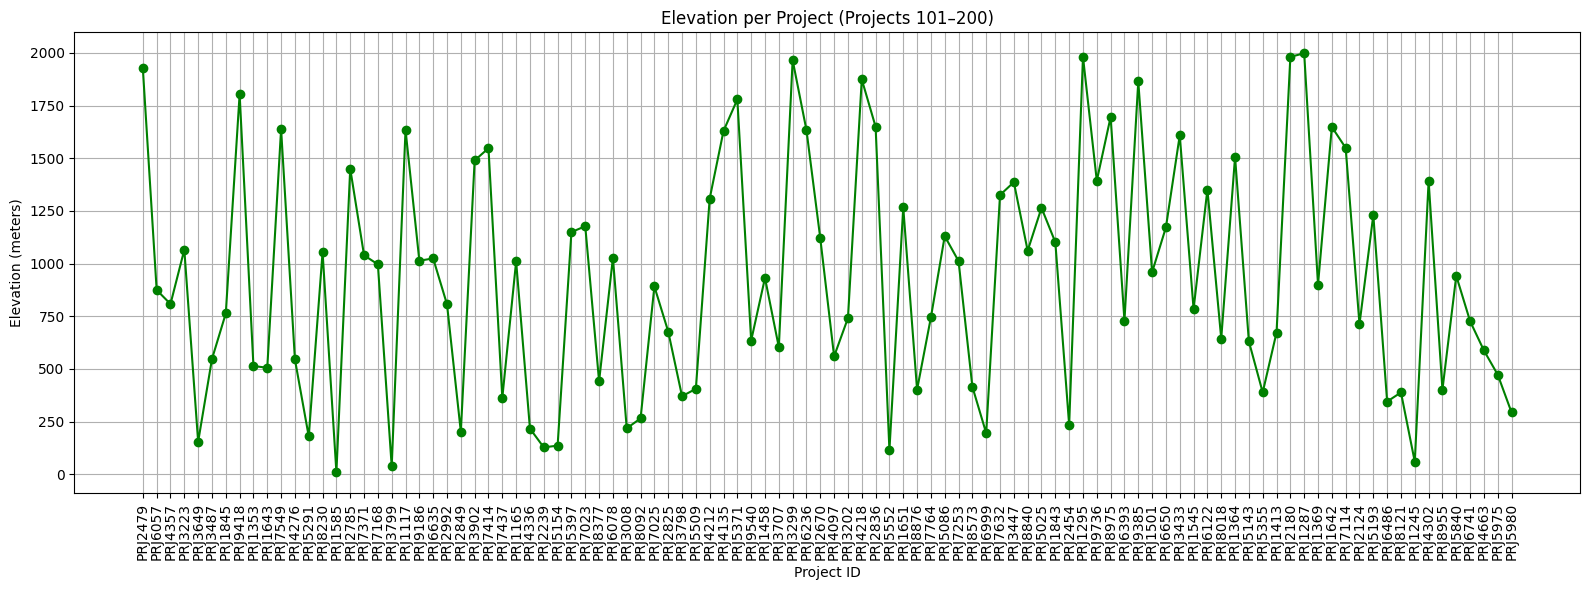

In [ ]:
import matplotlib.pyplot as plt

# Use the unique_df DataFrame from your deduplication step
if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

# Plot projects 101 to 200
plot_df = unique_df.iloc[100:200] # 100 - 200 range data

plt.figure(figsize=(16, 6))
plt.plot(plot_df['project_id'], plot_df['elevation_meters'], marker='o', linestyle='-', color='g')
plt.title('Elevation per Project (Projects 101–200)')
plt.xlabel('Project ID')
plt.ylabel('Elevation (meters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

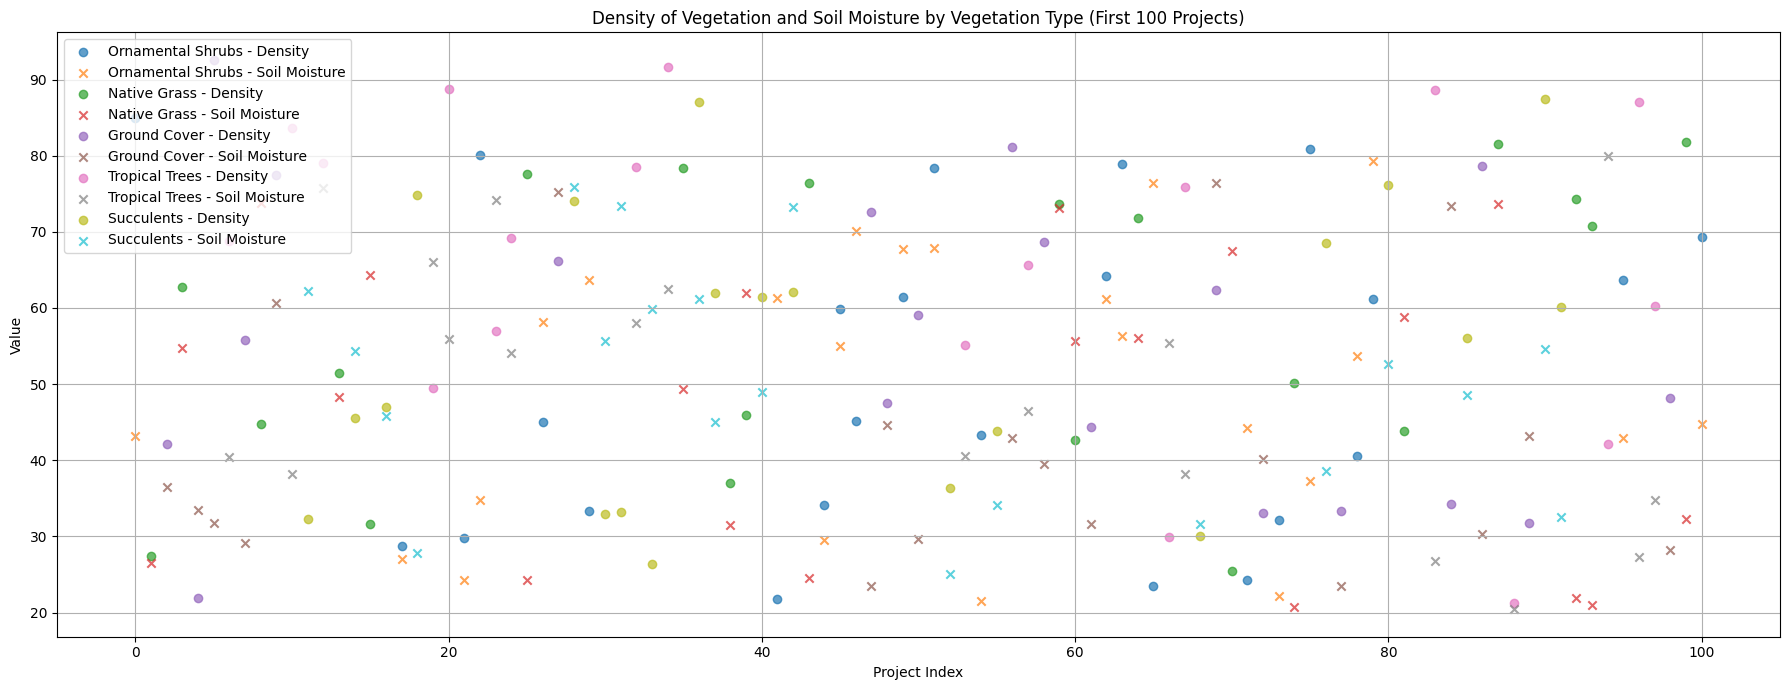

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("landscape_project_with_payment.csv")

if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

plot_df = unique_df.head(100)

plt.figure(figsize=(18, 7))

for veg_type in plot_df['vegetation_type'].unique():
    subset = plot_df[plot_df['vegetation_type'] == veg_type]
    plt.scatter(subset.index, subset['density_of_vegetation'], label=f"{veg_type} - Density", alpha=0.7)
    plt.scatter(subset.index, subset['soil_moisture'], label=f"{veg_type} - Soil Moisture", marker='x', alpha=0.7)

plt.title('Density of Vegetation and Soil Moisture by Vegetation Type (First 100 Projects)')
plt.xlabel('Project Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

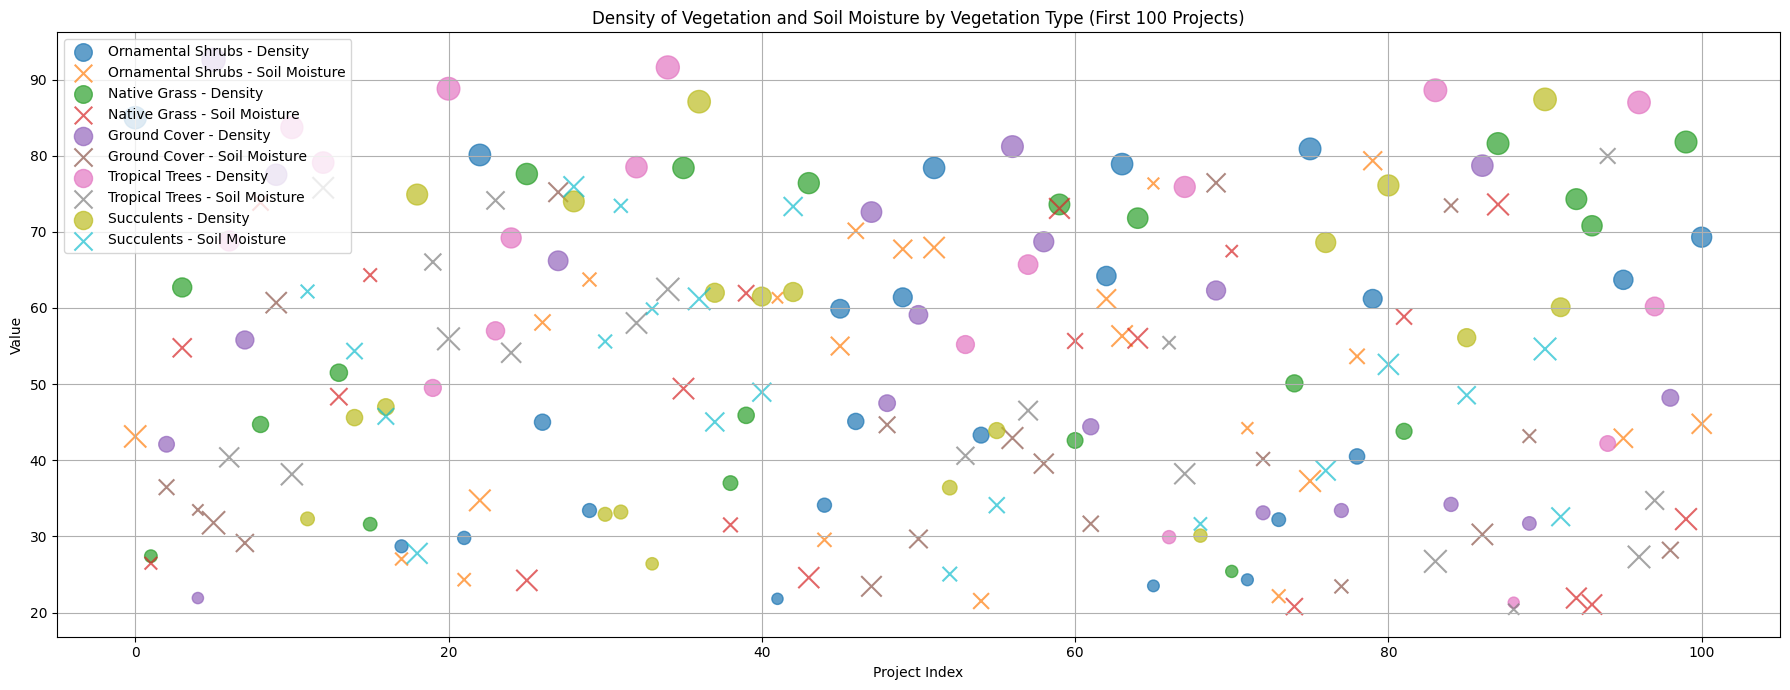

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("landscape_project_with_payment.csv")

if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

plot_df = unique_df.head(100)

plt.figure(figsize=(18, 7))

for veg_type in plot_df['vegetation_type'].unique():
    subset = plot_df[plot_df['vegetation_type'] == veg_type]
    # Size for density_of_vegetation
    plt.scatter(
        subset.index,
        subset['density_of_vegetation'],
        s=subset['density_of_vegetation']*3,  # Increase marker size based on density
        label=f"{veg_type} - Density",
        alpha=0.7
    )
    # Size for soil_moisture (optional: use a fixed or related size)
    plt.scatter(
        subset.index,
        subset['soil_moisture'],
        s=subset['density_of_vegetation']*3,  # Use same density for size
        label=f"{veg_type} - Soil Moisture",
        marker='x',
        alpha=0.7
    )

plt.title('Density of Vegetation and Soil Moisture by Vegetation Type (First 100 Projects)')
plt.xlabel('Project Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

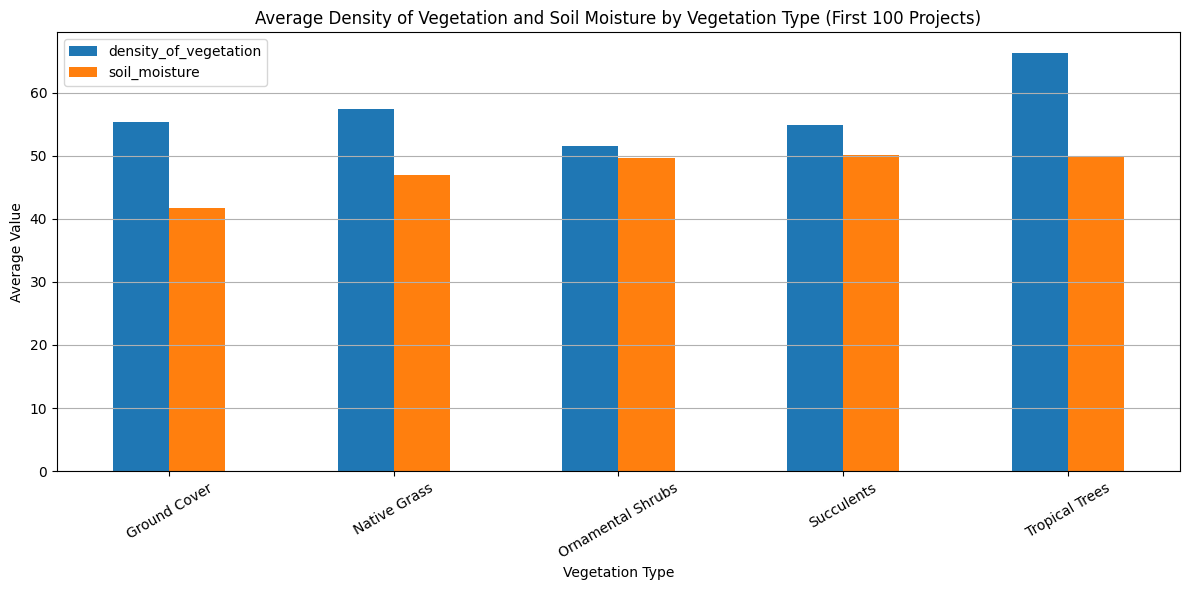

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("landscape_project_with_payment.csv")

if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

plot_df = unique_df.head(100)

# Group by vegetation_type and calculate mean density and mean soil moisture
grouped = plot_df.groupby('vegetation_type')[['density_of_vegetation', 'soil_moisture']].mean()

# Bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Density of Vegetation and Soil Moisture by Vegetation Type (First 100 Projects)')
plt.xlabel('Vegetation Type')
plt.ylabel('Average Value')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

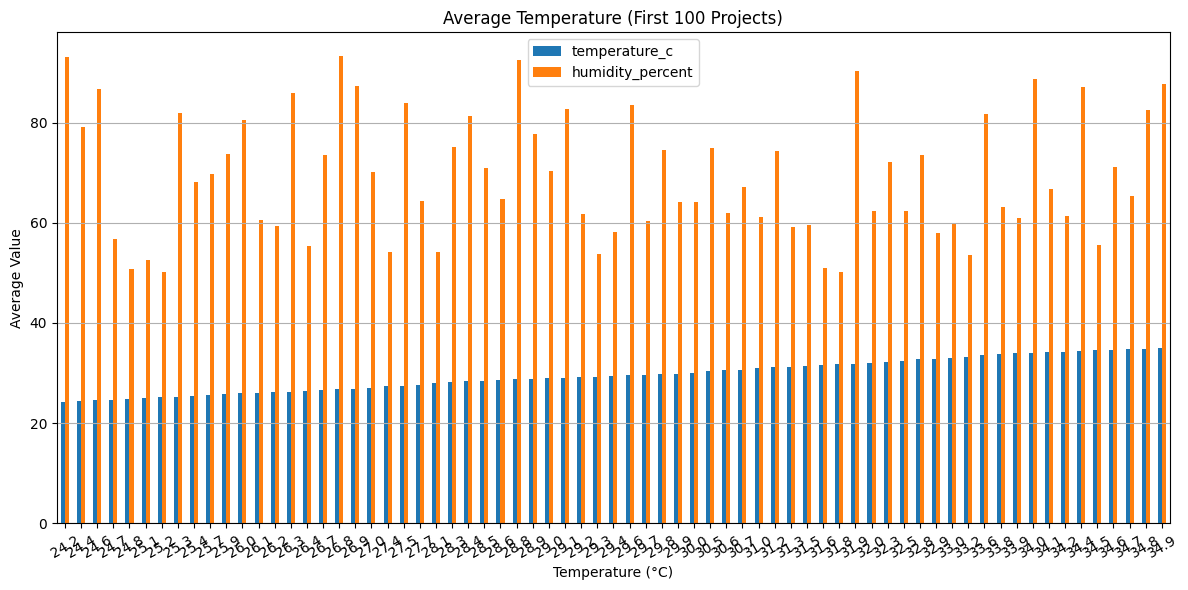

In [ ]:
import matplotlib.pyplot as plt     
import pandas as pd

df = pd.read_csv("landscape_project_with_payment.csv")

if 'unique_df' not in locals():
    unique_df = df.drop_duplicates(subset=["project_id"], keep='first')

plot_df = unique_df.head(100)
grouped = plot_df.groupby('temperature_c')[['temperature_c', 'humidity_percent']].mean()

ax = grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Temperature (First 100 Projects)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Value')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()